<a href="https://colab.research.google.com/github/GodHandOne/Deeplerning_Study/blob/Chapter_3/TensorFlow_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

创建一个全1张量

In [2]:
import tensorflow as tf
x=tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


创建一个全0张量

In [4]:
x=tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


从均值为0、标准差为1的正态分布中抽取随机张量

In [5]:
x=tf.random.normal(shape=(3,1),mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.950877  ]
 [-0.58242786]
 [ 0.6372189 ]], shape=(3, 1), dtype=float32)


从0和1之间的均匀分布中抽取随机张量

In [6]:
x=tf.random.uniform(shape=(3,1),minval=0.,maxval=1.)
print(x)

tf.Tensor(
[[0.25059223]
 [0.59817135]
 [0.9215169 ]], shape=(3, 1), dtype=float32)


创建一个TensorFlow变量，创建时需要对其进行初始化

In [7]:
v=tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.08870094],
       [0.25421858],
       [0.34039018]], dtype=float32)>


为TensorFlow变量赋值，v[0,0].assign为变量的子集赋值

In [13]:
v=tf.Variable(initial_value=tf.random.uniform(shape=(3,2)))
v.assign(tf.ones((3,2)))
v[0,0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[3., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>


assign_add +=

assign_sub -=

In [20]:
v=tf.Variable(initial_value=tf.random.uniform(shape=(3,2)))
print(v)
v.assign_add(v)
print(v)
v.assign_sub(tf.Variable(initial_value=tf.random.normal(shape=(3,2))))
print(v)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[0.6551033 , 0.30090284],
       [0.4636023 , 0.06932461],
       [0.8146653 , 0.37264097]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[1.3102067 , 0.6018057 ],
       [0.9272046 , 0.13864923],
       [1.6293306 , 0.74528193]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.5106763 ,  0.29156765],
       [ 0.50771034,  0.6157644 ],
       [ 2.6844606 , -1.4973524 ]], dtype=float32)>


张量运算

a = tf.ones((2, 2))

b = tf.square(a)  ←----求平方

c = tf.sqrt(a)  ←----求平方根

d = b + c  ←----两个张量（逐元素）相加

e = tf.matmul(a, b)  ←----计算两个张量的积（详见第2章）

e *= d  ←----两个张量（逐元素）相乘


In [23]:
a=tf.ones((2,2))
b=tf.square(a)
c=tf.sqrt(a)
d=b+c
e=tf.matmul(a,b)
print(e)
e*=d
print(a,b,c,d,e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


#GradientTape的使用


In [24]:
input_var=tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
  result=tf.square(input_var)
gradient=tape.gradient(result,input_var) # 计算结果值相对于输入的梯度
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


对常数张量输入使用GradientTape

In [26]:
input_const=tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_const) # 监视输入的常数张量
  result=tf.sqrt(input_const)
gradient=tape.gradient(result,input_const)
print(gradient)

tf.Tensor(0.28867513, shape=(), dtype=float32)


利用嵌套的梯度带计算二阶梯度

In [3]:
time=tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position=4.9*time**2
  speed=inner_tape.gradient(position,time)
acceleration=outer_tape.gradient(speed,time)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## 利用TensorFlow编写线性分类器

在二维平面上随机生成两个类别的点

In [26]:
import numpy as np
num_samples_per_class=1000 #每一类的样本数
negative_samples=np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
print(negative_samples)

positive_samples=np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
print(positive_samples)

[[-1.88998129  0.5867215 ]
 [ 0.11160421  1.98259719]
 [ 1.29534385  2.58722742]
 ...
 [-0.4137674   2.55332472]
 [ 1.82555264  4.12945869]
 [ 0.12023547  2.65326028]]
[[ 3.78760407 -0.15607118]
 [ 0.95392812 -0.61350069]
 [ 2.68064801  0.19307869]
 ...
 [ 1.75142799 -1.06957462]
 [ 2.33045958  0.3966602 ]
 [ 3.4094754  -0.6441256 ]]


将两个类别堆叠成一个形状为（2000，2）的数组

In [27]:
inputs=np.vstack((negative_samples,positive_samples)).astype(np.float32)
print(inputs)

[[-1.8899813   0.5867215 ]
 [ 0.11160421  1.9825972 ]
 [ 1.2953439   2.5872273 ]
 ...
 [ 1.751428   -1.0695746 ]
 [ 2.3304596   0.3966602 ]
 [ 3.4094753  -0.6441256 ]]


生成对应的目标标签，一个形状为（2000，1）的数组，元素都是0或1

In [28]:
targets=np.vstack((np.zeros((num_samples_per_class,1),dtype="float32"),np.ones((num_samples_per_class,1),dtype="float32")))
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


利用matplotlib来绘制图像

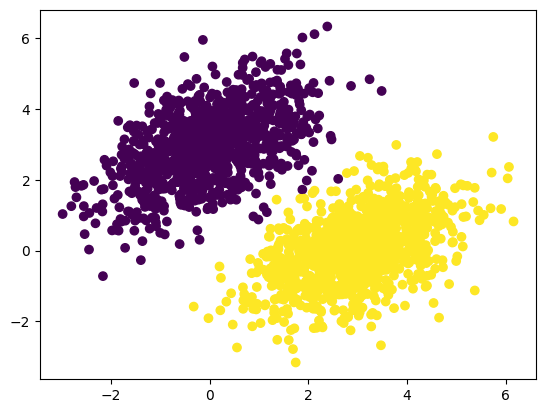

In [37]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

创建一个线性分类器，用来学习划分这两个类别。线性分类器采用仿射变换（prediction = W•input + b），我们对其进行训练，使预测值与目标值之差的平方最小化。

In [38]:
input_dim=2
output_dim=1
W=tf.Variable(initial_value=tf.random.uniform(shape=(input_dim,output_dim)))
b=tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.1709826],
       [0.7064537]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


前向传播

In [39]:
def model(inputs):
  return tf.matmul(inputs,W)+b

均方误差损失函数

In [40]:
def square_loss(targets,predictions):
  per_sample_losses=tf.square(targets-predictions) # 计算预测值与目标值之间的差值平方
  return tf.reduce_mean(per_sample_losses)

训练过程，接收训练数据并更新权重W和b

In [53]:
learning_rate=0.1
def training_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions=model(inputs)
    loss=square_loss(targets,predictions)
  grad_loss_wrt_W,grad_loss_wrt_b=tape.gradient(loss,[W,b]) # 计算w和b对应loss的梯度变化值
  W.assign_sub(grad_loss_wrt_W*learning_rate) # 根据梯度值更新权重
  b.assign_sub(grad_loss_wrt_b*learning_rate)
  print(W.value)
  print(b.value)
  return loss

构建批量训练循环过程

In [54]:
for step in range(40):
  loss=training_step(inputs,targets)
  print(f"Loss at step {step}:{loss:.4f}")

<bound method BaseResourceVariable.value of <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.15096106],
       [-0.1509311 ]], dtype=float32)>>
<bound method BaseResourceVariable.value of <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.50017655], dtype=float32)>>
Loss at step 0:0.0262
<bound method BaseResourceVariable.value of <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.15094116],
       [-0.15095146]], dtype=float32)>>
<bound method BaseResourceVariable.value of <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.5002538], dtype=float32)>>
Loss at step 1:0.0262
<bound method BaseResourceVariable.value of <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.15092221],
       [-0.15097085]], dtype=float32)>>
<bound method BaseResourceVariable.value of <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.5003274], dtype=float32)>>
Loss at step 2:0.0262
<bound method Base

绘制结果图,模型对训练数据的预测值与目标值非常接近

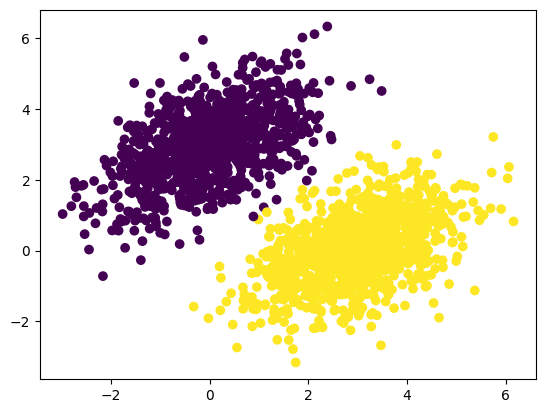

In [46]:
predictions=model(inputs)
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)
plt.show()

绘制出预测好的直线

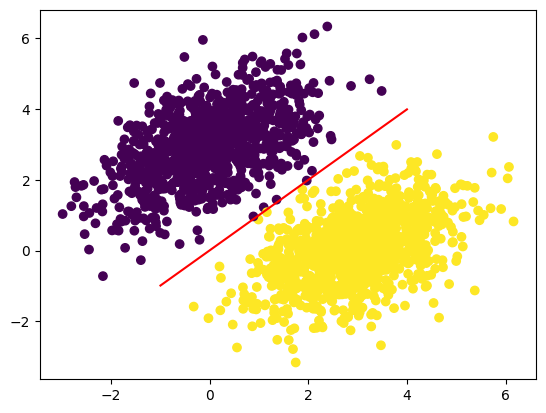

In [57]:
x=np.linspace(-1,4,100)
y=-W[0]/W[1]*x-b/W[1]+0.5/W[1]
plt.plot(x,y,"-r") # 绘制成红色的线
plt.scatter(inputs[:,0],inputs[:,1],c=predictions[:,0]>0.5)